<a href="https://colab.research.google.com/github/MukundhaReddy45/CODSOFT-CREDIT/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from  sklearn.ensemble import RandomForestClassifier

In [9]:
df_train = pd.read_csv('/content/fraudTrain.csv', header = 0)
df_test = pd.read_csv('/content/fraudTest.csv', header = 0)

In [10]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0


In [11]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [12]:
df_train.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
15588,15588,2019-01-10 00:19:11,4836998673805450,fraud_Rau and Sons,grocery_pos,209.38,Susan,Hardy,F,516 Brown Parks,...,46.0062,-86.2555,6469,Trade mark attorney,1979-04-12,87dc8e62d8b279247210d790461e4ec7,1326154751,46.561589,-85.326704,0.0
15589,15589,2019-01-10 00:20:34,6538891242532018,fraud_McGlynn-Jaskolski,misc_pos,28.14,Jodi,Rodriguez,F,5796 Lee Coves Apt. 286,...,36.0244,-90.9288,7155,"Engineer, control and instrumentation",1977-03-23,8472275424c4eb650f1ecc6ea2160ff0,1326154834,35.116052,-90.268677,0.0
15590,15590,2019-01-10 00:21:08,6011603272871604,fraud_Torp-Labadie,gas_transport,37.12,Robert,Holland,M,431 Tracy Expressway,...,33.1410,-84.1759,4138,Field seismologist,1969-05-16,b3a586accf43851d0ce0e65b5abf221e,1326154868,34.112678,-83.936772,0.0
15591,15591,2019-01-10 00:21:25,4210078554961359092,fraud_Stracke-Lemke,grocery_pos,144.65,Valerie,Clark,F,7402 West Ranch,...,43.9210,-122.7806,1420,Systems analyst,1965-11-11,da01c21ec74d92fcc8c2a28ff7424c8c,1326154885,44.242978,-122.612829,0.0
15592,15592,2019-01-10 00:22:39,6011329966782895,"fraud_Johnson, Runolfsdottir and Mayer",misc_net,4.90,Lauren,Butler,F,030 Seth Divide Suite 355,...,36.0557,-96.0602,413574,"Teacher, special educational needs",1971-09-01,2193637f20ab9d66ee177127475a36ab,1326154959,35.880016,NaN,NaN


In [13]:
df_train.shape

(15593, 23)

In [14]:
df_test.shape

(35008, 23)

In [15]:
df_train.size

358639

In [16]:
df_test.size

805184

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15593 entries, 0 to 15592
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15593 non-null  int64  
 1   trans_date_trans_time  15593 non-null  object 
 2   cc_num                 15593 non-null  int64  
 3   merchant               15593 non-null  object 
 4   category               15593 non-null  object 
 5   amt                    15593 non-null  float64
 6   first                  15593 non-null  object 
 7   last                   15593 non-null  object 
 8   gender                 15593 non-null  object 
 9   street                 15593 non-null  object 
 10  city                   15593 non-null  object 
 11  state                  15593 non-null  object 
 12  zip                    15593 non-null  int64  
 13  lat                    15593 non-null  float64
 14  long                   15593 non-null  float64
 15  ci

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35008 entries, 0 to 35007
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             35008 non-null  int64  
 1   trans_date_trans_time  35008 non-null  object 
 2   cc_num                 35008 non-null  int64  
 3   merchant               35008 non-null  object 
 4   category               35008 non-null  object 
 5   amt                    35008 non-null  float64
 6   first                  35008 non-null  object 
 7   last                   35008 non-null  object 
 8   gender                 35008 non-null  object 
 9   street                 35008 non-null  object 
 10  city                   35008 non-null  object 
 11  state                  35008 non-null  object 
 12  zip                    35008 non-null  int64  
 13  lat                    35008 non-null  float64
 14  long                   35008 non-null  float64
 15  ci

In [19]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,15593.000000,1.559300e+04,15593.000000,15593.000000,15593.000000,15593.000000,1.559300e+04,1.559300e+04,15593.000000,15592.000000,15592.000000
mean,7796.000000,4.227322e+17,70.287882,49063.363496,38.537959,-90.429812,9.211852e+04,1.325778e+09,38.540346,-90.423190,0.006414
std,4501.455709,1.316358e+18,126.759764,27027.725226,5.164709,14.225426,3.075263e+05,2.268460e+05,5.190365,14.246013,0.079830
min,0.000000,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.165823,-166.629875,0.000000
25%,3898.000000,1.800462e+14,9.610000,26041.000000,34.690200,-96.962300,7.430000e+02,1.325582e+09,34.787849,-97.074937,0.000000
50%,7796.000000,3.520550e+15,47.960000,48206.000000,39.342600,-87.591700,2.471000e+03,1.325814e+09,39.347491,-87.516981,0.000000
75%,11694.000000,4.642255e+15,83.300000,72059.000000,41.811400,-80.158000,2.112500e+04,1.325968e+09,41.886835,-80.219347,0.000000
max,15592.000000,4.992346e+18,5444.240000,99783.000000,65.689900,-67.950300,2.906700e+06,1.326155e+09,66.645176,-66.967742,1.000000


In [20]:
df_test.describe()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,35008.000000,3.500800e+04,35008.000000,35008.000000,35008.000000,35008.000000,3.500800e+04,3.500700e+04,35007.000000,35007.000000,35007.000000
mean,17503.500000,4.149182e+17,69.131486,48557.951754,38.549832,-90.077189,8.945956e+04,1.372307e+09,38.546758,-90.076530,0.004085
std,10106.083448,1.305317e+18,133.139981,26797.354254,5.053311,13.579377,3.030985e+05,3.020174e+05,5.089403,13.590071,0.063783
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.057104,-166.584303,0.000000
25%,8751.750000,1.800429e+14,9.660000,25832.000000,34.668900,-96.727000,7.430000e+02,1.372009e+09,34.756095,-96.774987,0.000000
50%,17503.500000,3.518759e+15,46.750000,48088.000000,39.383200,-87.456900,2.456000e+03,1.372344e+09,39.387560,-87.351373,0.000000
75%,26255.250000,4.634956e+15,82.922500,72011.000000,42.015800,-80.128400,2.032800e+04,1.372553e+09,41.981051,-80.188967,0.000000
max,35007.000000,4.992346e+18,6600.440000,99783.000000,65.689900,-67.950300,2.906700e+06,1.372858e+09,66.669356,-66.955602,1.000000


In [21]:
df_train.isnull().values.any()

True

In [22]:
df_test.isnull().values.any()

True

In [23]:
df_train.count()

Unnamed: 0               15593
trans_date_trans_time    15593
cc_num                   15593
merchant                 15593
category                 15593
amt                      15593
first                    15593
last                     15593
gender                   15593
street                   15593
city                     15593
state                    15593
zip                      15593
lat                      15593
long                     15593
city_pop                 15593
job                      15593
dob                      15593
trans_num                15593
unix_time                15593
merch_lat                15593
merch_long               15592
is_fraud                 15592
dtype: int64

In [24]:
df_test.count()

Unnamed: 0               35008
trans_date_trans_time    35008
cc_num                   35008
merchant                 35008
category                 35008
amt                      35008
first                    35008
last                     35008
gender                   35008
street                   35008
city                     35008
state                    35008
zip                      35008
lat                      35008
long                     35008
city_pop                 35008
job                      35008
dob                      35008
trans_num                35008
unix_time                35007
merch_lat                35007
merch_long               35007
is_fraud                 35007
dtype: int64

In [25]:
df_combined = pd.concat([df_train, df_test], axis = 0)

In [26]:
df_combined.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [27]:
df_combined.shape

(50601, 23)

In [28]:
df_combined.size

1163823

In [29]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50601 entries, 0 to 35007
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             50601 non-null  int64  
 1   trans_date_trans_time  50601 non-null  object 
 2   cc_num                 50601 non-null  int64  
 3   merchant               50601 non-null  object 
 4   category               50601 non-null  object 
 5   amt                    50601 non-null  float64
 6   first                  50601 non-null  object 
 7   last                   50601 non-null  object 
 8   gender                 50601 non-null  object 
 9   street                 50601 non-null  object 
 10  city                   50601 non-null  object 
 11  state                  50601 non-null  object 
 12  zip                    50601 non-null  int64  
 13  lat                    50601 non-null  float64
 14  long                   50601 non-null  float64
 15  city_po

In [30]:
df_combined.drop(labels = ["first", "last", "job", "dob", "trans_num", "street", "trans_date_trans_time","city","state"], axis = 1, inplace = True)

In [31]:
df_combined.head()

,Unnamed: 0,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,28654,36.0788,-81.1781,3495,1.325376e+09,36.011293,-82.048315,0.0
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,48.8878,-118.2105,149,1.325376e+09,49.159047,-118.186462,0.0
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,83252,42.1808,-112.2620,4154,1.325376e+09,43.150704,-112.154481,0.0
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632,46.2306,-112.1138,1939,1.325376e+09,47.034331,-112.561071,0.0
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,24433,38.4207,-79.4629,99,1.325376e+09,38.674999,-78.632459,0.0


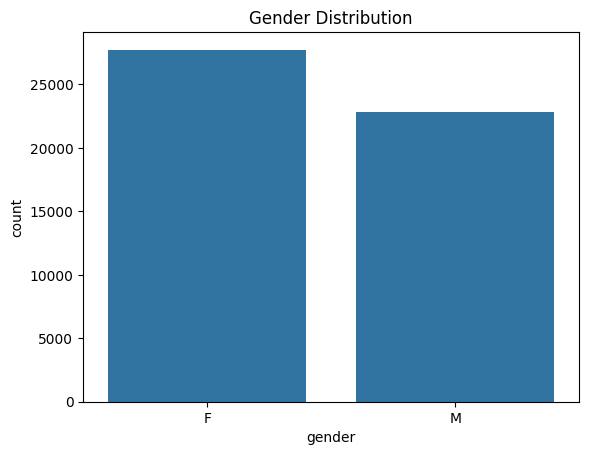

In [32]:
sns.countplot(x='gender', data=df_combined)
plt.title("Gender Distribution")
plt.show()